### Basics of Python in Data Science

In [1]:
# for non-anaconda users: "pip install numpy pandas"
# for anaconda users: "conda install pip" then "pip install numpy pandas" 
import pandas as pd
import numpy as np

In [2]:
bank_train = pd.read_csv("/Users/antran/Google Drive/USD_Teaching/ADS-502/WebsiteDataSets/bank_marketing_training.csv")

Take a look at the size of our data

In [3]:
bank_train.shape

(26874, 21)

Look at the variable names of our dataset

In [4]:
bank_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'days_since_previous', 'previous', 'previous_outcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'response'],
      dtype='object')

First 5 rows

In [5]:
bank_train.head() # head() shows the first 5 records of any dataset by default. head(x) shows first x records

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [6]:
bank_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


### Data Preparation

Let's take a look at the `days_since_previous` variable in our data

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

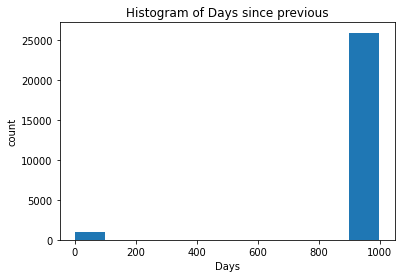

In [8]:
plt.hist(bank_train['days_since_previous'])
plt.title('Histogram of Days since previous')
plt.xlabel('Days')
plt.ylabel('count')

Identify all records with `days_since_previous` value of 999 and replace them with the Python code for missing numbers, **NaN**

In [9]:
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999: np.nan})

Replicate the `education` variable, and name it `education_numeric`, in preparation for replacing its categorical values with numeric ones

In [10]:
bank_train['education']

0                   basic.4y
1                high.school
2                    unknown
3                high.school
4                high.school
                ...         
26869      university.degree
26870      university.degree
26871               basic.4y
26872    professional.course
26873    professional.course
Name: education, Length: 26874, dtype: object

In [11]:
bank_train['education_numeric'] = bank_train['education']

Set up a dictionary specifically for converting the categorical values in the education_numeric variable to numeric values

In [12]:
dict_edu = {"education_numeric": {"illiterate": 0,
                                  "basic.4y": 4,
                                  "basic.6y": 6,
                                  "basic.9y": 9,
                                  "high.school": 12,
                                  "professional.course": 12,
                                  "university.degree": 16,
                                  "unknown": np.nan}}

Tell Python to use the dictionary to replace the variable's values

In [13]:
bank_train.replace(dict_edu, inplace=True)

### Standardizing Numeric Fields

$$ z = \frac{X-mean}{std} $$

In [14]:
bank_train['age_z'] = (bank_train['age'] - np.mean(bank_train['age'])) / np.std(bank_train['age'])

In [15]:
bank_train['age_z']

0        1.539625
1        1.635778
2        0.097330
3       -1.441118
4       -1.056506
           ...   
26869   -0.383435
26870   -0.287282
26871   -1.056506
26872    3.174226
26873    0.578095
Name: age_z, Length: 26874, dtype: float64

Text(0, 0.5, 'count')

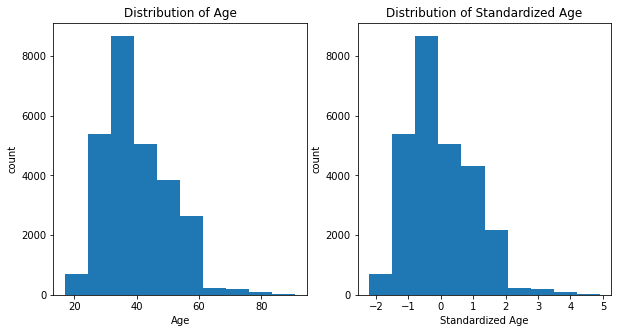

In [16]:
# normal age
plt.rcParams['figure.figsize'] = [10, 5] # adjust the size of next plot [width, height]

plt.subplot(1, 2, 1) # create a subplot with 1 row, 2 columns and the order of this plot
plt.hist(bank_train['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('count')

# standardized age
plt.subplot(1, 2, 2) # create a subplot with 1 row, 2 columns and the order of this plot
plt.hist(bank_train['age_z'])
plt.title('Distribution of Standardized Age')
plt.xlabel('Standardized Age')
plt.ylabel('count')

### Identifying Outliers

A rough rule of thumb is that a data value is an outlier if its z‐value is either greater than 3, or less than −3

In [17]:
bank_train_outliers = (bank_train['age_z'] > 3) | (bank_train['age_z'] < -3)

In [18]:
bank_train_outliers

0        False
1        False
2        False
3        False
4        False
         ...  
26869    False
26870    False
26871    False
26872     True
26873    False
Name: age_z, Length: 26874, dtype: bool

How many outliers in `age_z`?

In [19]:
sum(bank_train_outliers)

228

Remove the outliers in `age_z` from our dataset

In [20]:
bank_train = bank_train[~bank_train_outliers] # ~ means exclude 

### Identify Multicollinearity

In [21]:
# !pip install statsmodels: ! to install packages directly in notebooks for the first time
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

cereals = pd.read_csv('/Users/antran/Google Drive/USD_Teaching/ADS-502/WebsiteDataSets/cereals.csv')

Once the data set is in Python, pull out the 3 predictor variables and put them in their own data frame since we're going to work with 3 variables for the sake of simplicity. Call the data frame X

In [22]:
X = pd.DataFrame(cereals[['Sugars', 'Fiber', 'Potass']])

Now that we have the predictor variables all together, use the `scatter_matrix()` command with X as the input to create a scatterplot matrix

array([[<AxesSubplot:xlabel='Sugars', ylabel='Sugars'>,
        <AxesSubplot:xlabel='Fiber', ylabel='Sugars'>,
        <AxesSubplot:xlabel='Potass', ylabel='Sugars'>],
       [<AxesSubplot:xlabel='Sugars', ylabel='Fiber'>,
        <AxesSubplot:xlabel='Fiber', ylabel='Fiber'>,
        <AxesSubplot:xlabel='Potass', ylabel='Fiber'>],
       [<AxesSubplot:xlabel='Sugars', ylabel='Potass'>,
        <AxesSubplot:xlabel='Fiber', ylabel='Potass'>,
        <AxesSubplot:xlabel='Potass', ylabel='Potass'>]], dtype=object)

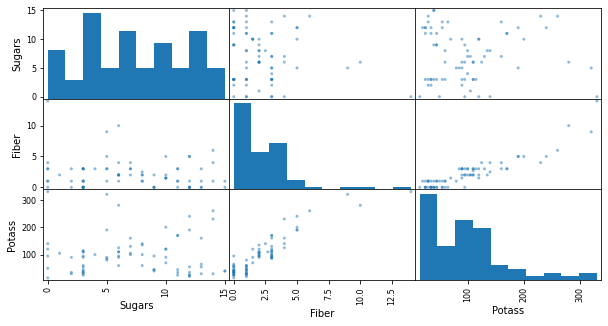

In [23]:
pd.plotting.scatter_matrix(X)

Take a look at the correlation matrix

In [24]:
X.corr()

,Sugars,Fiber,Potass
Sugars,1.000000,-0.138760,0.001414
Fiber,-0.138760,1.000000,0.911528
Potass,0.001414,0.911528,1.000000


To obtain the Variance Inflation Factors (VIF) values, we need to do a little data cleaning first. Use the `dropna()` command on the X data frame to remove any records with missing values



| VIF              | Description           |
| ---------------- | --------------------- |
| ~1               | not correlated        |
| 1 <= VIF <= 10   | moderately correlated |
| VIF > 10         | highly correlated     |

In [25]:
X = X.dropna()

Then, make sure you add the constant term in the X data frame

In [26]:
X = sm.add_constant(X)

Finally, run the `variance_inflation_factor()` command as given below to obtain the VIF values for all four columns in the X data frame

In [27]:
vif_values = [inf.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [28]:
vif_values

[5.749093668697551, 1.158760830266874, 6.8500495939437975, 6.693981514266847]

The first output will include a VIF value for the constant term we added; ignore it. The VIF values of interest are for the three predictor variables, which are the second, third, and fourth numbers output by the variance_inflation_factor() command
